<a href="https://colab.research.google.com/github/HRITIK-RANJAN/Data-Science-Projects/blob/main/catVsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hritik567","key":"96ae8df8e158ab11bae74e37a4e74c1b"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 25.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [7]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten ,BatchNormalization,Dropout

In [9]:
#GENERATORS
train_ds=keras.utils.image_dataset_from_directory(directory='/content/train',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256))
test_ds=keras.utils.image_dataset_from_directory(directory='/content/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [11]:
#create CNN model
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
hit=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 81s 110ms/step - loss: 0.6005 - accuracy: 0.6662 - val_loss: 0.5060 - val_accuracy: 0.7482
Epoch 2/10
625/625 [==============================] - 58s 93ms/step - loss: 0.4668 - accuracy: 0.7779 - val_loss: 0.4383 - val_accuracy: 0.7902
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.3764 - accuracy: 0.8306 - val_loss: 0.5092 - val_accuracy: 0.7890
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2708 - accuracy: 0.8835 - val_loss: 0.5501 - val_accuracy: 0.7896
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1551 - accuracy: 0.9373 - val_loss: 1.0056 - val_accuracy: 0.7404
Epoch 6/10
625/625 [==============================] - 60s 95ms/step - loss: 0.0984 - accuracy: 0.9632 - val_loss: 0.8803 - val_accuracy: 0.7810
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0674 - accuracy: 0.9768 - val_loss: 1.1628 - val_accurac

In [14]:
!nvidia-smi

Tue Feb 20 15:36:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              29W /  70W |   6273MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

###  Ways to reduce overfitting are
<ol>
<li>Add more Data</li>
<li>Data Augmentation</li>
<li>L1/L2 Regularization</li>
<li> Dropout</li>
<li>Batch Norm </li>
<li>Reduce Complexity </li>


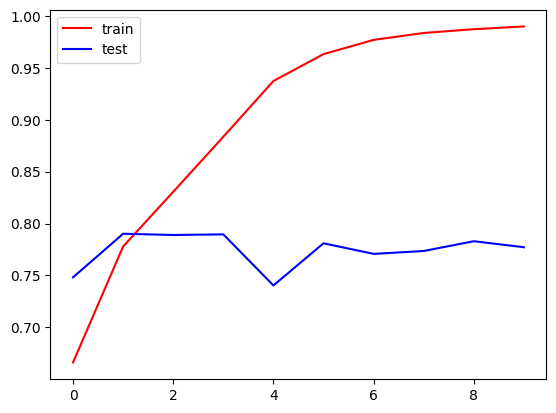

In [16]:
import matplotlib.pyplot as plt
plt.plot(hit.history['accuracy'],color='red',label='train')
plt.plot(hit.history['val_accuracy'],color='blue',label='test' )
plt.legend()
plt.show()

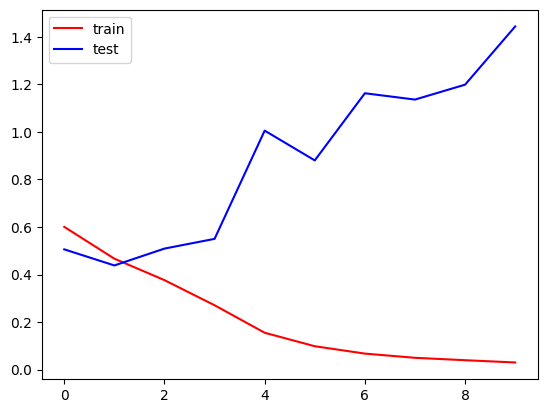

In [17]:
plt.plot(hit.history['loss'],color='red',label='train')
plt.plot(hit.history['val_loss'],color='blue',label='test' )
plt.legend()
plt.show()

In [20]:
#create CNN model
model2= Sequential()
model2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model2.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model2.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hit2=model2.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 76s 115ms/step - loss: 1.4878 - accuracy: 0.5687 - val_loss: 0.7282 - val_accuracy: 0.5280
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6338 - accuracy: 0.6356 - val_loss: 0.6036 - val_accuracy: 0.6744
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5756 - accuracy: 0.6963 - val_loss: 0.7609 - val_accuracy: 0.6262
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5351 - accuracy: 0.7188 - val_loss: 0.5943 - val_accuracy: 0.7014
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4852 - accuracy: 0.7578 - val_loss: 0.5297 - val_accuracy: 0.7170
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4585 - accuracy: 0.7750 - val_loss: 0.4814 - val_accuracy: 0.7712
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3893 - accuracy: 0.8152 - val_loss: 0.4773 - val_ac

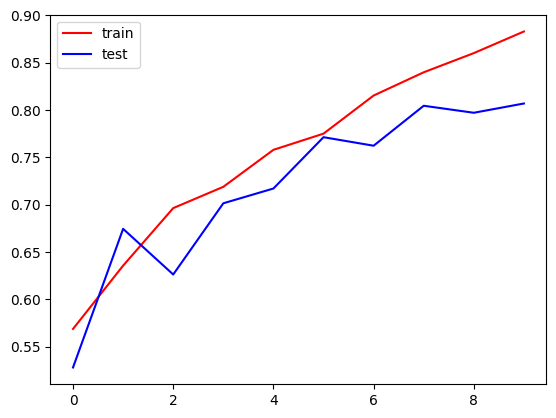

In [23]:

plt.plot(hit2.history['accuracy'],color='red',label='train')
plt.plot(hit2.history['val_accuracy'],color='blue',label='test' )
plt.legend()
plt.show()

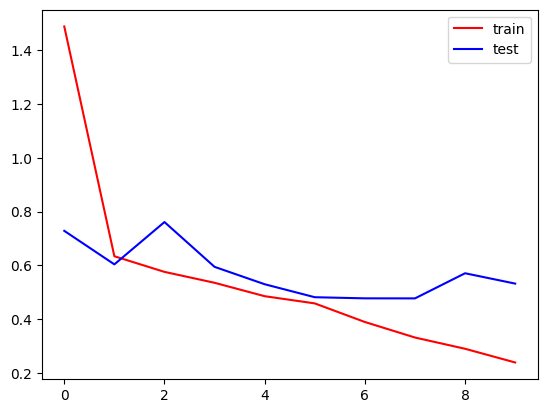

In [24]:
plt.plot(hit2.history['loss'],color='red',label='train')
plt.plot(hit2.history['val_loss'],color='blue',label='test' )
plt.legend()
plt.show()